In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_text
import tensorflow_text as text
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.layers import *
import tensorflow_hub as hub
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
final=pd.read_csv('/content/Final (2).csv')

In [ ]:
final

,Description,Patient dialogue,Doctor dialogue,Patient gender,Patient age group,Emotion,Tag 1,Tag 2,Tag 3
0,Why am i having itchy feeling in tip of penis ...,Hi. After i masturbate. I sometimes have an i...,"Hello,,Itching after masturbating is due to t...",Male,None,Other,Sexology,NaN,NaN
1,What are the early signs and symptoms of pregn...,"Hello Doctor,I got my period delayed by 3 days...",you should visit your gynecologist and get ...,Female,None,Other,obstetrics and gynecology (OB-GYN),NaN,NaN
2,What is the cure for ulcer inside nose and goo...,my 9 year old daughter has what appears to be ...,Mouth ulcers are usually suggestive of inter-c...,Female,Child,Other,ENT,Paediatrics,Pharmacology
3,Is Mini pills safe to use?,I've recently been having a period after sex a...,The progestin-only pill is better than regular...,Female,None,Fear,obstetrics and gynecology (OB-GYN),NaN,NaN
4,Is low basal body temperature a sign of ovulat...,I have been charting for a year and i have bee...,"Hi there, I have understood your concern. I wi...",Female,None,Fear,obstetrics and gynecology (OB-GYN),NaN,NaN
...,...,...,...,...,...,...,...,...,...
6309,what for lesuride od 75 is prescribed for what??,patient: what for lesuride od 75 is prescribed...,doctor: Thanks for using healthcaremagic.Lesur...,None,None,Other,Psychology,NaN,NaN
6310,I need to get off injecting the drug,patient: i am a 47 yr old mum who has beimg in...,doctor: HIThanks for using healthcare magicIn ...,None,Middle Age Adult,Sorrow,Psychology,NaN,NaN
6311,How to relieve the severe stress?,patient: My husband has been crying quite alot...,"doctor: Hi,I do appreciate your concern for yo...",Male,Adult,Sorrow,Psychology,NaN,NaN
6312,How long does withdrawal symptoms of Zoloft ex...,patient: Hello. I started taking 100 mg Zoloft...,"doctor: Hi,Thanks for choosing Healthcaremagic...",None,None,Disappointed,Psychology,NaN,NaN


In [ ]:
df = final
df=df.astype(str)
tagging='Patient age group'
labels = sorted(list(df[tagging].unique()))
length = len(labels)
label_count=df.groupby(tagging)[tagging].agg('count')
label_count.to_numpy(dtype=int)
label_count = np.expand_dims(label_count, axis=0)
label_count.shape=(length,1)
labels=np.array(labels)
labels.shape=(length,1)
label_count=np.column_stack((labels,label_count))
data = pd.DataFrame(label_count, columns=['Label', 'Count'])
convert_dict = {'Count': int}
  
data = data.astype(convert_dict)
data

,Label,Count
0,Adult,922
1,Child,228
2,Infant,167
3,Middle Age Adult,364
4,None,3961
5,Senior Adult,259
6,Teen,227
7,Toddler,186


In [ ]:
final.drop(['Description', 'Doctor dialogue','Patient gender','Tag 2','Tag 3','Tag 1','Emotion'], axis=1, inplace=True)

In [ ]:
final 

,Patient dialogue,Patient age group
0,Hi. After i masturbate. I sometimes have an i...,None
1,"Hello Doctor,I got my period delayed by 3 days...",None
2,my 9 year old daughter has what appears to be ...,Child
3,I've recently been having a period after sex a...,None
4,I have been charting for a year and i have bee...,None
...,...,...
6309,patient: what for lesuride od 75 is prescribed...,None
6310,patient: i am a 47 yr old mum who has beimg in...,Middle Age Adult
6311,patient: My husband has been crying quite alot...,Adult
6312,patient: Hello. I started taking 100 mg Zoloft...,None


In [ ]:
final['Patient age group'].unique()

array(['None', 'Child', 'Toddler', 'Middle Age Adult', 'Adult',
       'Senior Adult', 'Teen', 'Infant'], dtype=object)

In [ ]:
values=['Guilt','Lonely','NaN','nan']
final = final[final['Emotion'].isin(values) == False

In [ ]:
classes=sorted(list(final['Patient age group'].unique()))

In [ ]:
final

,Patient dialogue,Patient age group
0,Hi. After i masturbate. I sometimes have an i...,None
1,"Hello Doctor,I got my period delayed by 3 days...",None
2,my 9 year old daughter has what appears to be ...,Child
3,I've recently been having a period after sex a...,None
4,I have been charting for a year and i have bee...,None
...,...,...
6309,patient: what for lesuride od 75 is prescribed...,None
6310,patient: i am a 47 yr old mum who has beimg in...,Middle Age Adult
6311,patient: My husband has been crying quite alot...,Adult
6312,patient: Hello. I started taking 100 mg Zoloft...,None


In [ ]:
df = final
df=df.astype(str)
tagging='Patient age group'
labels = sorted(list(df[tagging].unique()))
length = len(labels)
label_count=df.groupby(tagging)[tagging].agg('count')
label_count.to_numpy(dtype=int)
label_count = np.expand_dims(label_count, axis=0)
label_count.shape=(length,1)
labels=np.array(labels)
labels.shape=(length,1)
label_count=np.column_stack((labels,label_count))
data = pd.DataFrame(label_count, columns=['Label', 'Count'])
convert_dict = {'Count': int}
  
data = data.astype(convert_dict)
data

,Label,Count
0,Adult,922
1,Child,228
2,Infant,167
3,Middle Age Adult,364
4,None,3961
5,Senior Adult,259
6,Teen,227
7,Toddler,186


In [ ]:
final=final. dropna()

In [ ]:
X=final.iloc[:,0]
y=final.iloc[:,1]

In [ ]:
lst = list(final['Patient age group'].unique())
len(lst)

8

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
x_train

4591    patient: I would like to know if my boyfriend ...
2460    Hello doctor,I have numbness in my right side ...
6050    patient: About 30 minutes ago, I noticed that ...
3524    Hi I ve been having wierd feelings around my b...
917     Hi I have severe knee pain and am stiff all ov...
                              ...                        
3571    Hi doctor,I was recently diagnosed to be diabe...
6074    patient: hi Iam taking nano leo capsules and r...
344                  What s advices about smoking sheesha
2300    I have carried a test for liver profile and th...
2389    well. i ve been experiencing weird feelings in...
Name: Patient dialogue, Length: 5051, dtype: object

In [ ]:
X_train_patient_dialogue = x_train.to_numpy()
x_train_patient_dialogue = np.asarray(X_train_patient_dialogue).astype(str)

X_test_patient_dialogue = x_test.to_numpy()
x_test_patient_dialogue = np.asarray(X_test_patient_dialogue).astype(str)


In [ ]:
y_train=pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:

y_train_ = np.asarray(y_train.values).astype('float32')
y_test_ = np.asarray(y_test.values).astype('float32')

In [ ]:
preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
text_inputs = [tf.keras.layers.Input(shape=(), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]
seq_length = 512
bert_pack_inputs = hub.KerasLayer(preprocessor.bert_pack_inputs, arguments=dict(seq_length=seq_length))
encoder_inputs = bert_pack_inputs(tokenized_inputs)
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]
embedding_model = tf.keras.Model(text_inputs, pooled_output)

In [ ]:
from keras.layers import Layer
import keras.backend as K

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
text_input_patient_dialogue = Input(shape=(),dtype=tf.string, name='Patient dialogue')
encode_output_patient_dialogue = embedding_model(text_input_patient_dialogue)

#bilstm_patient_dialogue = Bidirectional(CuDNNLSTM(units=256,return_sequences=True))(encode_output_patient_dialogue)

#att = attention()(bilstm_patient_dialogue)

output = Dense(8, activation='softmax')(encode_output_patient_dialogue)
model = Model(inputs=[text_input_patient_dialogue ], outputs=output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Patient dialogue (InputLaye  [(None,)]                0         
 r)                                                              
                                                                 
 model_2 (Functional)        (None, 768)               109482241 
                                                                 
 dense_2 (Dense)             (None, 8)                 6152      
                                                                 
Total params: 109,488,393
Trainable params: 6,152
Non-trainable params: 109,482,241
_________________________________________________________________


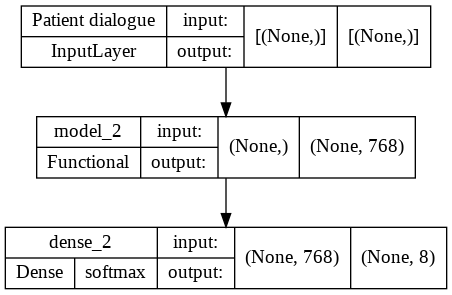

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

# Training...

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/bert _emotion.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='auto', 
                                               patience=5, 
                                               verbose=1)

hist = model.fit(X_train_patient_dialogue, y_train_, 
                epochs=100, 
                batch_size=4, verbose=1,
                callbacks=[early_stopping,model_checkpoint_callback])

Epoch 1/100
1263/1263 [==============================] - 242s 192ms/step - loss: 1.0552 - accuracy: 0.6432
Epoch 2/100
1263/1263 [==============================] - 242s 192ms/step - loss: 1.0471 - accuracy: 0.6502
Epoch 3/100
1263/1263 [==============================] - 242s 192ms/step - loss: 1.0305 - accuracy: 0.6535
Epoch 4/100
1263/1263 [==============================] - 242s 192ms/step - loss: 1.0253 - accuracy: 0.6543
Epoch 5/100
1263/1263 [==============================] - 243s 192ms/step - loss: 1.0119 - accuracy: 0.6557
Epoch 6/100
1263/1263 [==============================] - 242s 191ms/step - loss: 1.0104 - accuracy: 0.6585
Epoch 7/100
1263/1263 [==============================] - 243s 192ms/step - loss: 0.9957 - accuracy: 0.6607
Epoch 8/100
1263/1263 [==============================] - 239s 189ms/step - loss: 0.9964 - accuracy: 0.6607
Epoch 9/100
1263/1263 [==============================] - 239s 189ms/step - loss: 0.9889 - accuracy: 0.6601
Epoch 10/100
1263/1263 [=============

# Loading trained model

In [ ]:
model.evaluate( X_test_patient_dialogue, y_test_, batch_size=1)

1252/1252 [==============================] - 63s 50ms/step - loss: 0.5376 - accuracy: 0.8666


[0.5375537276268005, 0.8666134476661682]

In [ ]:
pred = model.predict( X_test_patient_dialogue)

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test_, axis=1)

from sklearn.metrics import f1_score
print("F1 score(macro)",f1_score(y_test, y_pred, average='weighted'))
print("F1 score(micro)",f1_score(y_test, y_pred, average='micro'))



F1 score(macro) 0.8079982986126308
F1 score(micro) 0.8666134185303515


# Confusion Matrix

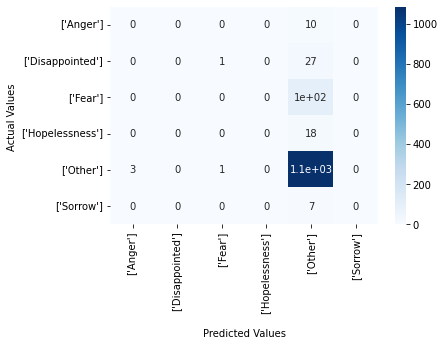

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
#ax.set_title('Description only\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8666134185303515

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        18
           4       0.87      1.00      0.93      1089
           5       0.00      0.00      0.00         7

    accuracy                           0.87      1252
   macro avg       0.15      0.17      0.15      1252
weighted avg       0.76      0.87      0.81      1252



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
